In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [9]:
train = pd.read_csv('C:\\Users\\guilh_000\Documents\\tweetsclassify\\train.csv', encoding='latin-1')

print(train.shape)

(99989, 3)


In [10]:
train['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

In [11]:
pd.options.display.max_colwidth = 100
train.tail(10)

ItemID  Sentiment  \
99979   99991          1   
99980   99992          1   
99981   99993          0   
99982   99994          1   
99983   99995          0   
99984   99996          0   
99985   99997          1   
99986   99998          0   
99987   99999          1   
99988  100000          1   

                                                                                             SentimentText  
99979                                         @cunningstunts till i can go home been here till saturday  x  
99980                                                           @cunningstunts22 afternoon jim hows you  x  
99981      @cup_a_tea The foot is really bad. Like the worst it's ever been. I can barely walk right now.   
99982            @Cup_Of_Katy Have fun doing health &amp; safety :S Just switch off and look spritely  XXX  
99983  @cupati It took me waaay too long to get your message about being ashamed...right now I really a...  
99984                       @Cupcake  seems like a repeating problem   hope you're able to find something.  
99985  @cupcake__ arrrr we both replied to each other over different tweets at the same time  , i'll se...  
99986                                                                       @CuPcAkE_2120 ya i thought so   
99987                                        @Cupcake_Dollie Yes. Yes. I'm glad you had more fun with me.   
99988                                                                      @cupcake_kayla haha yes you do

In [13]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J":'a',"N":'n',"V":'v',"R":'r'}
    words_and_tags = [(w, tag_dict.get(pos[0],'n'))for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag)for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

import string
import nltk
from nltk.corpus import stopwords
import re
def normalizer(tweet):
    punct = list(string.punctuation)
    stop_words = stopwords.words('english')
    additional_stop_words = ['RT','rt','via','...','http','twitpic','tinyurl','www', 'amp']
    stopword_list = punct + stop_words + additional_stop_words
    
    tweet = re.sub("#",  " ", tweet)           # Replace pattern # -> ' '
    tweet = re.sub("dont|not|isnt|doesnt|arent|aint", "negation", tweet) #contains negation
    tweet = re.sub("(@[A-Za-z0-9]+)", " ", tweet)
    tweet_ = re.sub("(\w+:\/\/\S+)", " ", tweet)
    tweet__ = re.sub("[^a-zA-Z]", " ", tweet_)
    lemmatized = lemmatize_with_postag(tweet__)
    tokens = nltk.word_tokenize(lemmatized)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stopword_list, lower_case))
    return filtered_result

In [14]:
train['normalized'] = train.SentimentText.apply(normalizer)
train['normal'] = [' '.join(map(str, l)) for l in train['normalized']]

In [15]:
train.tail(20)

ItemID  Sentiment  \
99969   99981          0   
99970   99982          0   
99971   99983          0   
99972   99984          1   
99973   99985          1   
99974   99986          0   
99975   99987          0   
99976   99988          1   
99977   99989          1   
99978   99990          1   
99979   99991          1   
99980   99992          1   
99981   99993          0   
99982   99994          1   
99983   99995          0   
99984   99996          0   
99985   99997          1   
99986   99998          0   
99987   99999          1   
99988  100000          1   

                                                                                             SentimentText  \
99969                                                                                   @CTerry1985  Sorry   
99970                                                                  @CTerry1985 damn it, dont have sky    
99971       @CTerry1985 That's the thing; the new raft of Star Wars films were just a raft of #EpicFail s    
99972                                                                                            @cthagod    
99973                                                                                @ctham  #FollowFriday   
99974  @ctham #awaresg You are not wrong. But from a my own male point of view, I felt excluded (even w...   
99975                                         @ctham @mommyfizz cuz you big burly man.  hahahahahahahahaha   
99976  @ctham @Wilsurn Trying to get a wider range of shirts to suit everyone. Please make requests if ...   
99977                                                      @ctham Haha I love the passion in your support    
99978  @cthulhullahoop That sucks...I like living in Coopersville, I don't need no special bags or anyt...   
99979                                         @cunningstunts till i can go home been here till saturday  x   
99980                                                           @cunningstunts22 afternoon jim hows you  x   
99981      @cup_a_tea The foot is really bad. Like the worst it's ever been. I can barely walk right now.    
99982            @Cup_Of_Katy Have fun doing health &amp; safety :S Just switch off and look spritely  XXX   
99983  @cupati It took me waaay too long to get your message about being ashamed...right now I really a...   
99984                       @Cupcake  seems like a repeating problem   hope you're able to find something.   
99985  @cupcake__ arrrr we both replied to each other over different tweets at the same time  , i'll se...   
99986                                                                       @CuPcAkE_2120 ya i thought so    
99987                                        @Cupcake_Dollie Yes. Yes. I'm glad you had more fun with me.    
99988                                                                      @cupcake_kayla haha yes you do    

                                                                             normalized  \
99969                                                                                []   
99970                                                                   [negation, sky]   
99971                              [thing, new, raft, star, wars, film, raft, epicfail]   
99972                                                                                []   
99973                                                                                []   
99974     [negation, wrong, male, point, view, felt, exclude, even, non, reply, thread]   
99975                                             [big, burly, man, hahahahahahahahaha]   
99976  [get, wider, range, shirt, suit, everyone, please, make, request, need, awaresg]   
99977                                                          [love, passion, support]   
99978                          [like, live, coopersville, need, special, bag, anything]   
99979                                                     [go, home, till, saturday, x]   
99980          

In [16]:
train['normal'].replace('', np.nan, inplace=True)
train.dropna(subset=['normal'], inplace=True)
#train.tail(20)

In [17]:
train['Sentiment'].value_counts()

1    52476
0    41516
Name: Sentiment, dtype: int64

In [18]:
def checktrain(val):
    a = train.index[train['normal'].str.contains(val)]
    if a.empty:
        return 'not found'
    elif len(a) > 1:
        return a.tolist()
    else:
        #only one value - return scalar  
        return a.item()

In [20]:
print (checktrain('negation'))

[31, 82, 92, 111, 114, 140, 189, 209, 218, 249, 257, 267, 280, 299, 312, 341, 352, 353, 370, 398, 435, 455, 456, 463, 466, 474, 484, 486, 506, 559, 560, 561, 587, 605, 607, 624, 626, 631, 633, 654, 672, 678, 684, 693, 701, 705, 712, 717, 728, 757, 771, 775, 778, 789, 824, 841, 845, 856, 864, 889, 893, 896, 919, 933, 950, 967, 971, 981, 984, 988, 1013, 1018, 1029, 1070, 1082, 1092, 1094, 1119, 1133, 1135, 1161, 1162, 1168, 1179, 1216, 1222, 1256, 1275, 1281, 1305, 1324, 1326, 1328, 1348, 1373, 1378, 1379, 1385, 1390, 1414, 1445, 1464, 1475, 1486, 1509, 1546, 1581, 1582, 1590, 1621, 1637, 1670, 1675, 1685, 1695, 1705, 1744, 1748, 1756, 1763, 1778, 1781, 1809, 1812, 1817, 1835, 1867, 1876, 1880, 1904, 1913, 1938, 1939, 1947, 1950, 2006, 2038, 2045, 2065, 2066, 2067, 2068, 2069, 2077, 2126, 2128, 2136, 2141, 2160, 2172, 2181, 2194, 2206, 2208, 2214, 2222, 2223, 2260, 2265, 2278, 2283, 2289, 2290, 2324, 2328, 2338, 2357, 2390, 2396, 2404, 2409, 2458, 2461, 2487, 2499, 2503, 2517, 2534, 2542

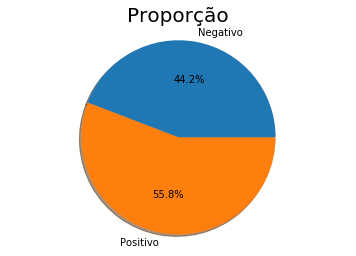

In [21]:
labels = ['Negativo', 'Positivo']
sizes = [train['Sentiment'].value_counts()[0],
         train['Sentiment'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Proporção', fontsize=20)
plt.show()

In [97]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer  

count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data =count_vectorizer.fit_transform(train['normal'])

#tfidfconverter = TfidfTransformer()  
#tfid_data = tfidfconverter.fit_transform(vectorized_data)

#indexed_data =hstack((np.array(range(0,tfid_data.shape[0]))[:,None],tfid_data))

#vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
#final_features = vectorizer.fit_transform(train['normal'])

indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))
#indexed_data =hstack((np.array(range(0,final_features.shape[0]))[:,None],final_features))

vectorized_data.shape
#tfid_data.shape
#final_features.shape

(93992, 352132)

In [98]:
targets = train.iloc[:, 1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(indexed_data, targets, test_size=0.25,random_state=100)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [87]:
#############################################################################################################
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB(fit_prior=False, alpha=3.0).fit(data_train, targets_train)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nb_pred = nbc.predict(data_test)

print(confusion_matrix(targets_test, nb_pred))
print(classification_report(targets_test,nb_pred))
print(accuracy_score(targets_test, nb_pred))

[[ 6593  3716]
 [ 3011 10178]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.66     10309
           1       0.73      0.77      0.75     13189

    accuracy                           0.71     23498
   macro avg       0.71      0.71      0.71     23498
weighted avg       0.71      0.71      0.71     23498

0.7137203166226913


In [62]:
#CHECK BEST PARAMETERS ONLY RUN IF FAST GPU

from sklearn.model_selection import GridSearchCV
hiperparameters = {'alpha': (1.0,1.5,2.0,2.5,3.0),'fit_prior':[True, False]}
grid = GridSearchCV(MultinomialNB(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

{'alpha': 2.5, 'fit_prior': True}
0.7096490481459415


In [63]:
#############################################################################################################
from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB(fit_prior=True, alpha=2.5).fit(data_train, targets_train)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nbm_pred = nbm.predict(data_test)

print(confusion_matrix(targets_test, nbm_pred))
print(classification_report(targets_test,nbm_pred))
print(accuracy_score(targets_test, nbm_pred))

[[ 6219  4090]
 [ 2567 10622]]
              precision    recall  f1-score   support

           0       0.71      0.60      0.65     10309
           1       0.72      0.81      0.76     13189

    accuracy                           0.72     23498
   macro avg       0.71      0.70      0.71     23498
weighted avg       0.72      0.72      0.71     23498

0.7166992935568984


In [65]:
########################################linear svm
from sklearn.svm import LinearSVC
lsvm= LinearSVC(C=0.1)
lsvm.fit(data_train, targets_train)

LinearSVC(C=0.1)

In [66]:
targets_pred = lsvm.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))

[[ 6230  4079]
 [ 2491 10698]]
              precision    recall  f1-score   support

           0       0.71      0.60      0.65     10309
           1       0.72      0.81      0.77     13189

    accuracy                           0.72     23498
   macro avg       0.72      0.71      0.71     23498
weighted avg       0.72      0.72      0.72     23498

0.7204017363179845


In [33]:
#CHECK BEST PARAMETERS ONLY RUN IF FAST GPU

hiperparameters = {'C': (0.01,0.1,1.0,5.0,10.0)}
grid = GridSearchCV(LinearSVC(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

{'C': 0.1}
0.712392597988714


In [67]:
########################################################################################################
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, targets_train)
    pred_i = knn.predict(data_test)
    error.append(np.mean(pred_i != targets_test))

Text(0,0.5,'Mean Error')

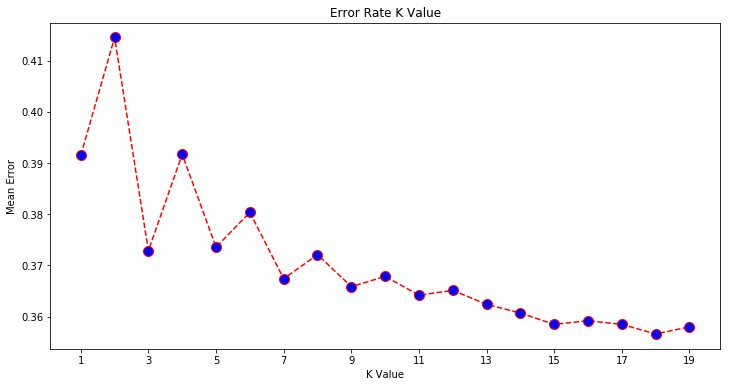

In [68]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.xticks(np.arange(1,20,2), np.arange(1,20,2))
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [69]:
kn = KNeighborsClassifier(n_neighbors=15)  
kn.fit(data_train, targets_train)

KNeighborsClassifier(n_neighbors=15)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

ky_pred = kn.predict(data_test)

print(confusion_matrix(targets_test, ky_pred))
print(classification_report(targets_test, ky_pred))
print(accuracy_score(targets_test, ky_pred))

[[ 4781  5528]
 [ 2896 10293]]
              precision    recall  f1-score   support

           0       0.62      0.46      0.53     10309
           1       0.65      0.78      0.71     13189

    accuracy                           0.64     23498
   macro avg       0.64      0.62      0.62     23498
weighted avg       0.64      0.64      0.63     23498

0.6415014043748404


In [71]:
#########################################################
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=0)
lrc.fit(data_train, targets_train)

C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [72]:
targets_pred = lrc.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))

[[ 6317  3992]
 [ 2576 10613]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.66     10309
           1       0.73      0.80      0.76     13189

    accuracy                           0.72     23498
   macro avg       0.72      0.71      0.71     23498
weighted avg       0.72      0.72      0.72     23498

0.7204868499446762


In [131]:
###################################################################################
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=100)
rfc.fit(data_train, targets_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [132]:
rfy_pred = rfc.predict(data_test)

print(confusion_matrix(targets_test, rfy_pred))
print(classification_report(targets_test, rfy_pred))
print(accuracy_score(targets_test, rfy_pred))

[[ 2136  6089]
 [  452 10056]]
              precision    recall  f1-score   support

           0       0.83      0.26      0.40      8225
           1       0.62      0.96      0.75     10508

    accuracy                           0.65     18733
   macro avg       0.72      0.61      0.57     18733
weighted avg       0.71      0.65      0.60     18733

0.6508300859445898


In [93]:
##### small tdif test
nbtdif = MultinomialNB(fit_prior=False, alpha=2.0).fit(data_train, targets_train)

In [94]:
nbm_pred = nbtdif.predict(data_test)

print(confusion_matrix(targets_test, nbm_pred))
print(classification_report(targets_test,nbm_pred))
print(accuracy_score(targets_test, nbm_pred))

[[7074 3235]
 [3792 9397]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67     10309
           1       0.74      0.71      0.73     13189

    accuracy                           0.70     23498
   macro avg       0.70      0.70      0.70     23498
weighted avg       0.70      0.70      0.70     23498

0.7009532726189462


In [95]:
##### small tdif test

lrctdif = LogisticRegression(random_state=0)
lrctdif.fit(data_train, targets_train)

C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [96]:
targets_pred = lrctdif.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))

[[ 6114  4195]
 [ 2566 10623]]
              precision    recall  f1-score   support

           0       0.70      0.59      0.64     10309
           1       0.72      0.81      0.76     13189

    accuracy                           0.71     23498
   macro avg       0.71      0.70      0.70     23498
weighted avg       0.71      0.71      0.71     23498

0.7122733849689336


In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nbm_pred = nbm.predict(data_train)

print(confusion_matrix(targets_train, nbm_pred))
print(classification_report(targets_train,nbm_pred))
print(accuracy_score(targets_train, nbm_pred))

[[26459  4748]
 [ 2158 37129]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     31207
           1       0.89      0.95      0.91     39287

    accuracy                           0.90     70494
   macro avg       0.91      0.90      0.90     70494
weighted avg       0.90      0.90      0.90     70494

0.9020342156779301


In [100]:
targets_pred = lsvm.predict(data_train)

print(confusion_matrix(targets_train, targets_pred))
print(classification_report(targets_train,targets_pred))
print(accuracy_score(targets_train, targets_pred))

[[28619  2588]
 [  761 38526]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     31207
           1       0.94      0.98      0.96     39287

    accuracy                           0.95     70494
   macro avg       0.96      0.95      0.95     70494
weighted avg       0.95      0.95      0.95     70494

0.95249241070162


In [101]:
######################################################### test model with new data
test = pd.read_csv('C:\\Users\\guilh_000\\Documents\\tweetsclassify\\test_tweets.csv')
test.shape

(17197, 2)

In [102]:
test.tail()

id  \
17192  49155   
17193  49156   
17194  49157   
17195  49158   
17196  49159   

                                                                                                     tweet  
17192  thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics  #brexit...  
17193     feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid  â¦   
17194  #hillary #campaigned today in #ohio((omg)) &amp; used words like "assets&amp;liability" never on...  
17195  happy, at work conference: right mindset leads to culture-of-development organizations    #work ...  
17196                                     my   song "so glad" free download!  #shoegaze #newmusic #newsong

In [38]:
test.drop(test.tail(17192).index,inplace=True)

In [39]:
test

id  \
0  31963   
1  31964   
2  31965   
3  31966   
4  31967   

                                                                                                 tweet  \
0           #studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦    
1   @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs ...   
2                              safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!!    
3  is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ð...   
4          3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦    

                                                                                normalized  \
0                            [require, passion, dedication, willpower, find, newmaterials]   
1                                                  [want, everyone, see, new, bird, movie]   
2                                            [heal, acne, altwaystoheal, healthy, healing]   
3  [hp, cursed, child, book, reservation, already, yes, harrypotter, pottermore, favorite]   
4                          [amaze, hilarious, nephew, eli, ahmir, uncle, dave, love, miss]   

                                                                         normal  
0                        require passion dedication willpower find newmaterials  
1                                              want everyone see new bird movie  
2                                       heal acne altwaystoheal healthy healing  
3  hp cursed child book reservation already yes harrypotter pottermore favorite  
4                         amaze hilarious nephew eli ahmir uncle dave love miss

In [ ]:
#newrow = {'tweet': input(), name=5} 
row = pd.Series({'id': 31977.0, 'tweet': input()},name=8)
test = test.append(row, ignore_index = True)
test.tail()

In [ ]:
test['normalized'] = test.tweet.apply(normalizer)
test['normal'] = [' '.join(map(str, l)) for l in test['normalized']]

In [48]:
test

id  \
0  31963.0   
1  31964.0   
2  31965.0   
3  31966.0   
4  31967.0   
5  31969.0   
6  31970.0   

                                                                                                 tweet  \
0           #studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦    
1   @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs ...   
2                              safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!!    
3  is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ð...   
4          3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦    
5                                                       corona beer is the worst beer I've ever tasted   
6                                                                  that llamen doesnt look good at all   

                                                                                normalized  \
0                            [require, passion, dedication, willpower, find, newmaterials]   
1                                                  [want, everyone, see, new, bird, movie]   
2                                            [heal, acne, altwaystoheal, healthy, healing]   
3  [hp, cursed, child, book, reservation, already, yes, harrypotter, pottermore, favorite]   
4                          [amaze, hilarious, nephew, eli, ahmir, uncle, dave, love, miss]   
5                                                                 [bad, beer, ever, taste]   
6                                                                   [negation, look, good]   

                                                                         normal  
0                        require passion dedication willpower find newmaterials  
1                                              want everyone see new bird movie  
2                                       heal acne altwaystoheal healthy healing  
3  hp cursed child book reservation already yes harrypotter pottermore favorite  
4                         amaze hilarious nephew eli ahmir uncle dave love miss  
5                                                           bad beer ever taste  
6                                                            negation look good

In [49]:
tweet_to_predict = test['normal']
x = count_vectorizer.transform(tweet_to_predict)
j = 0 
for i in ((lsvm.predict(x))):
    if i == 0:   
        print(j)
    j += 1


2
5
6


In [53]:
test['tweet'][5]

"I don't like you"

In [36]:
def check(val):
    a = test.index[test['normal'].str.contains(val)]
    if a.empty:
        return 'not found'
    elif len(a) > 1:
        return a.tolist()
    else:
        #only one value - return scalar  
        return a.item()

In [37]:
print (check('negation'))

[17, 29, 52, 73, 76, 99, 113, 130, 136, 150, 155, 192, 207, 248, 251, 259, 270, 286, 314, 318, 334, 342, 358, 363, 366, 369, 373, 387, 390, 391, 395, 416, 429, 434, 437, 466, 482, 486, 503, 510, 516, 523, 528, 538, 544, 560, 568, 569, 575, 679, 699, 726, 730, 763, 785, 841, 849, 852, 884, 886, 902, 904, 905, 911, 916, 930, 932, 940, 956, 968, 974, 979, 1035, 1041, 1047, 1070, 1073, 1075, 1084, 1087, 1090, 1094, 1104, 1105, 1110, 1127, 1131, 1133, 1144, 1145, 1153, 1156, 1172, 1173, 1191, 1198, 1201, 1243, 1248, 1266, 1338, 1360, 1370, 1408, 1413, 1435, 1438, 1466, 1482, 1484, 1487, 1488, 1502, 1503, 1507, 1515, 1531, 1542, 1549, 1581, 1588, 1597, 1599, 1605, 1635, 1637, 1695, 1697, 1698, 1767, 1771, 1776, 1793, 1795, 1798, 1799, 1806, 1837, 1842, 1844, 1861, 1875, 1891, 1906, 1918, 1970, 1996, 2011, 2013, 2016, 2019, 2022, 2060, 2065, 2082, 2093, 2107, 2114, 2126, 2150, 2169, 2194, 2201, 2247, 2255, 2267, 2270, 2272, 2319, 2329, 2336, 2342, 2344, 2358, 2370, 2371, 2373, 2375, 2376, 238

In [77]:
tweet_test = ["I negation like you"]
x = count_vectorizer.transform(tweet_test)
result = lsvm.predict(x)
if(result==1):
    print('Positive')
else:
    print('Negative')

Negative


In [66]:
###################################################
isnegative = train[train.Sentiment == 0]
print(isnegative.shape)

(41519, 5)


In [120]:
allnegative = isnegative['normal']
allnegative.head()

0                                               sad apl friend
1                                             new moon trailer
3    sooo im gunna cry dentist since suposed get crown put min
4                                                  mi bf cheat
5                                                   worry much
Name: normal, dtype: object

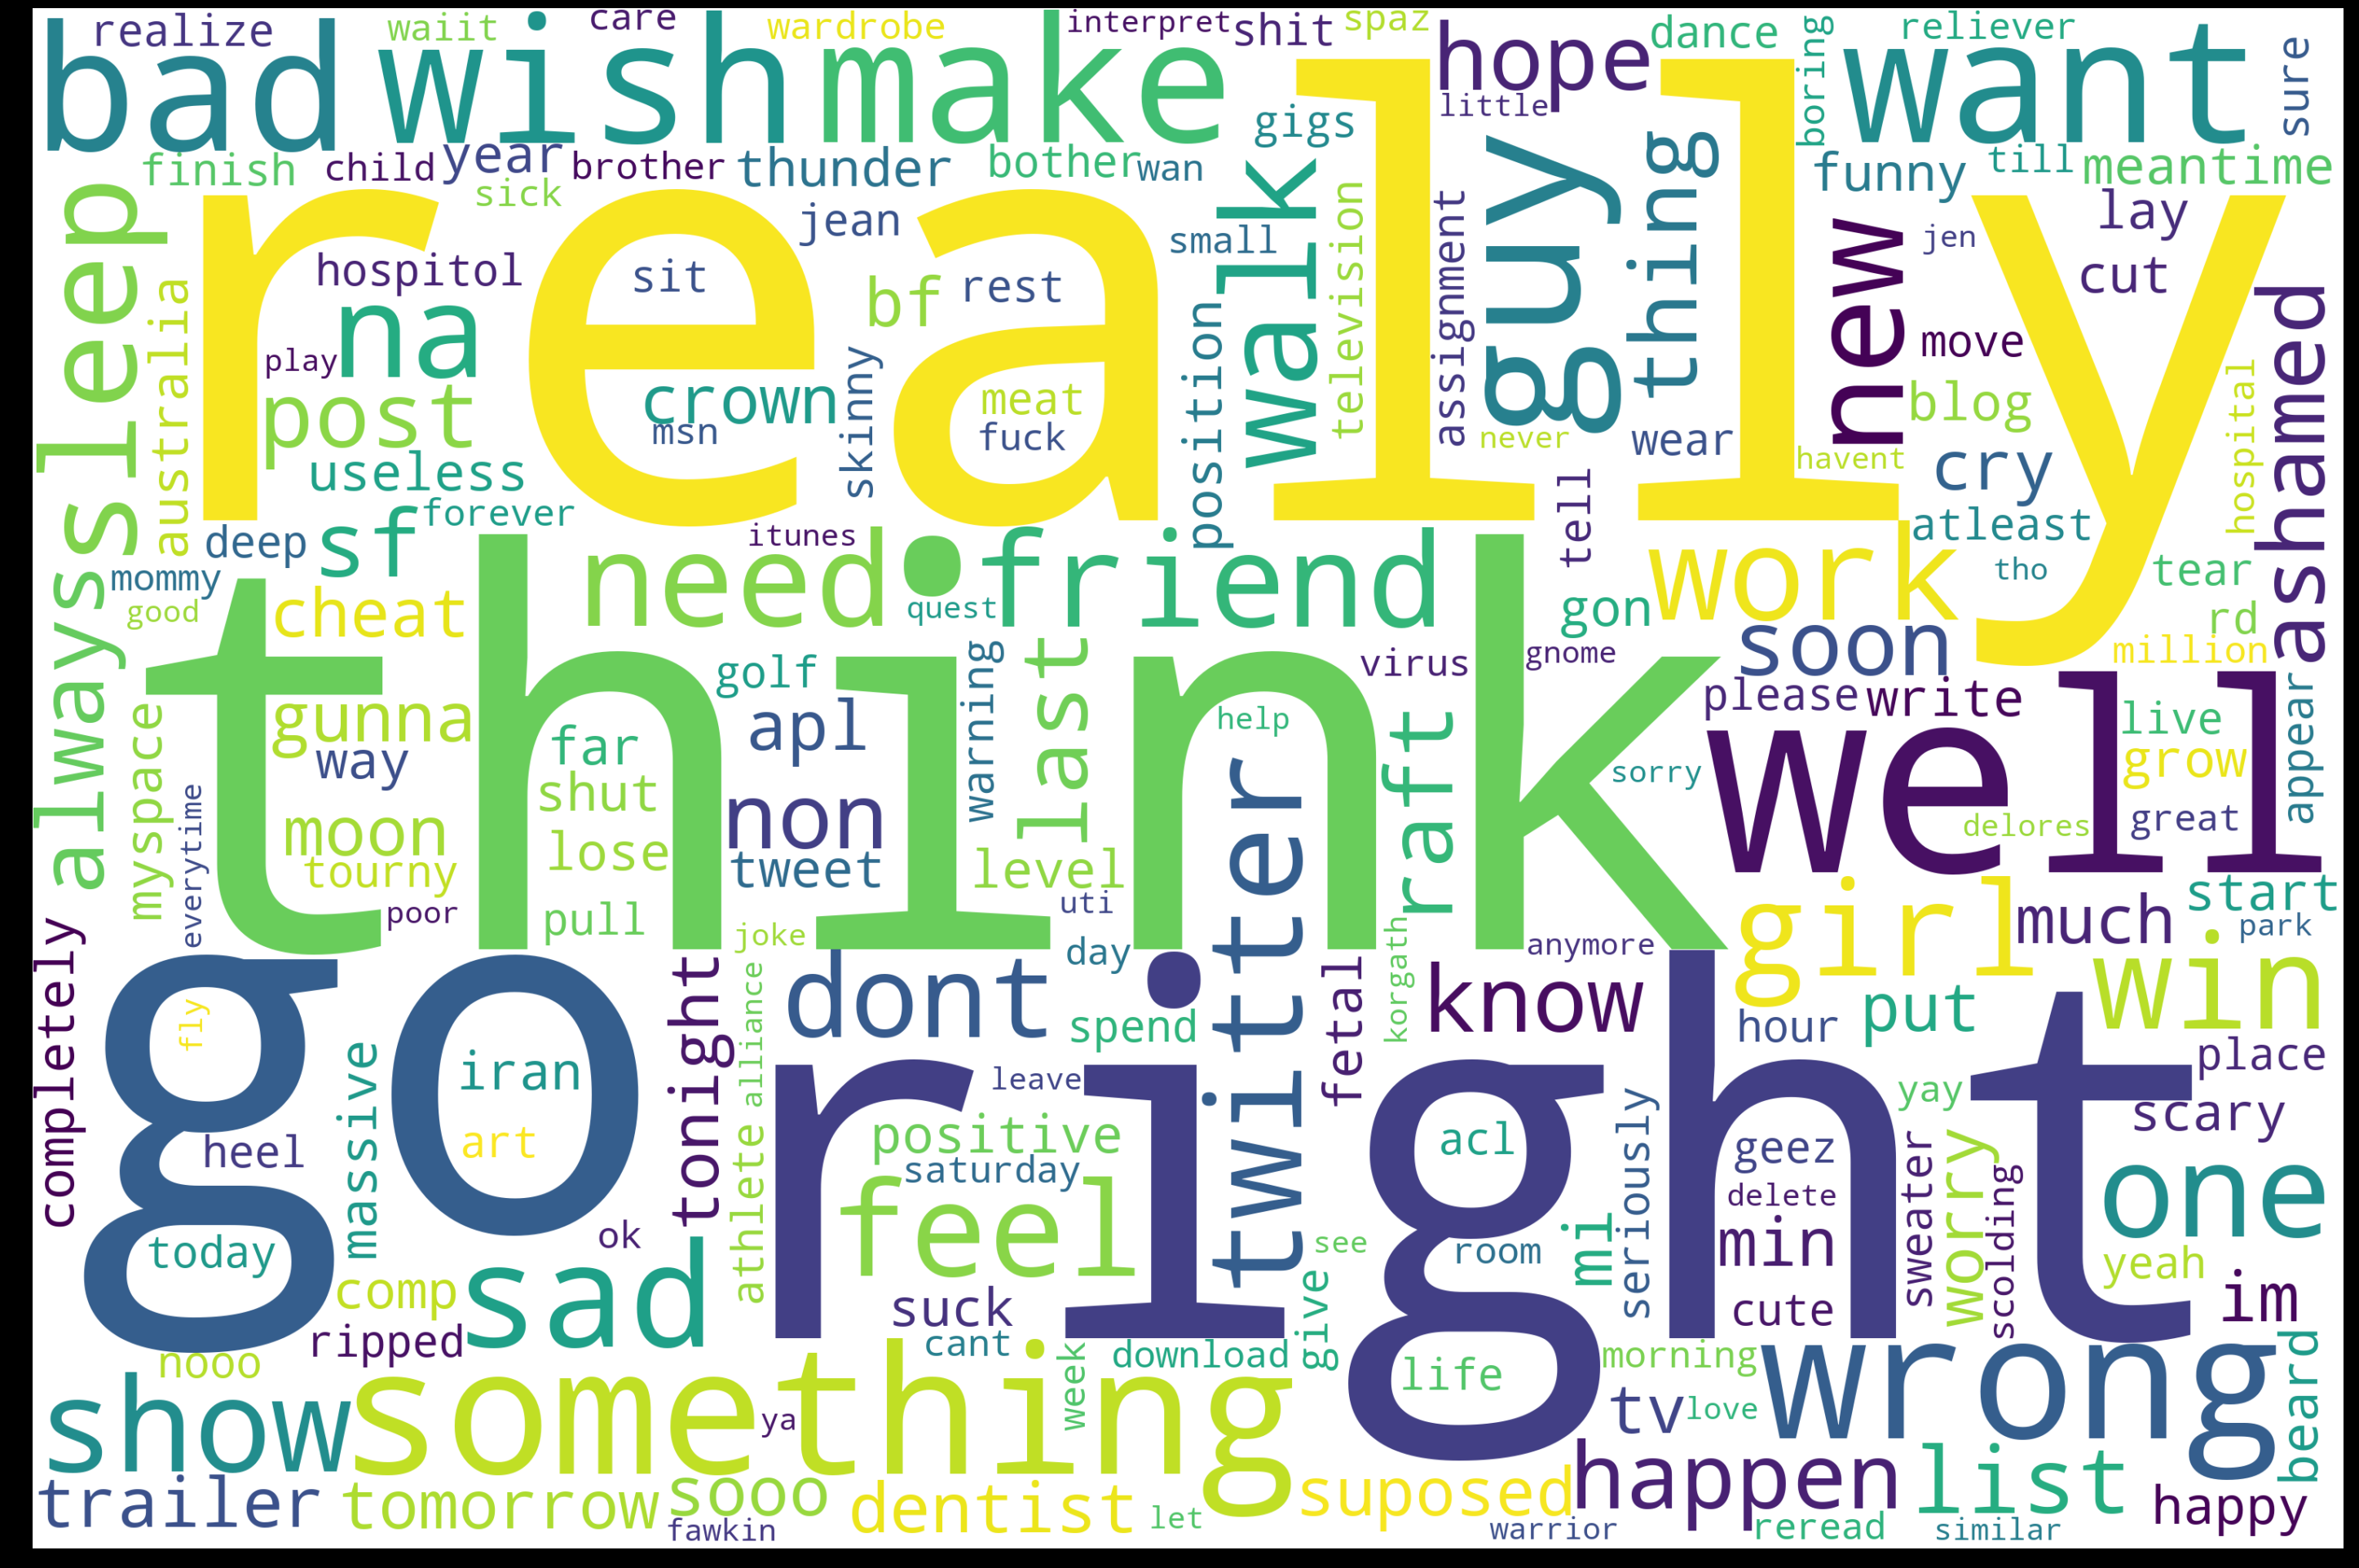

In [121]:
#build negativr wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = isnegative.normal
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [122]:
ispositive = train[train.Sentiment == 1]
print(ispositive.shape)

(52249, 5)


In [123]:
allpositive = ispositive['normal']
allpositive.head()

2                                       already
8                    uniform today miss already
9                                 wonder number
11                               hater face day
17    fine gon na go listen semisonic celebrate
Name: normal, dtype: object

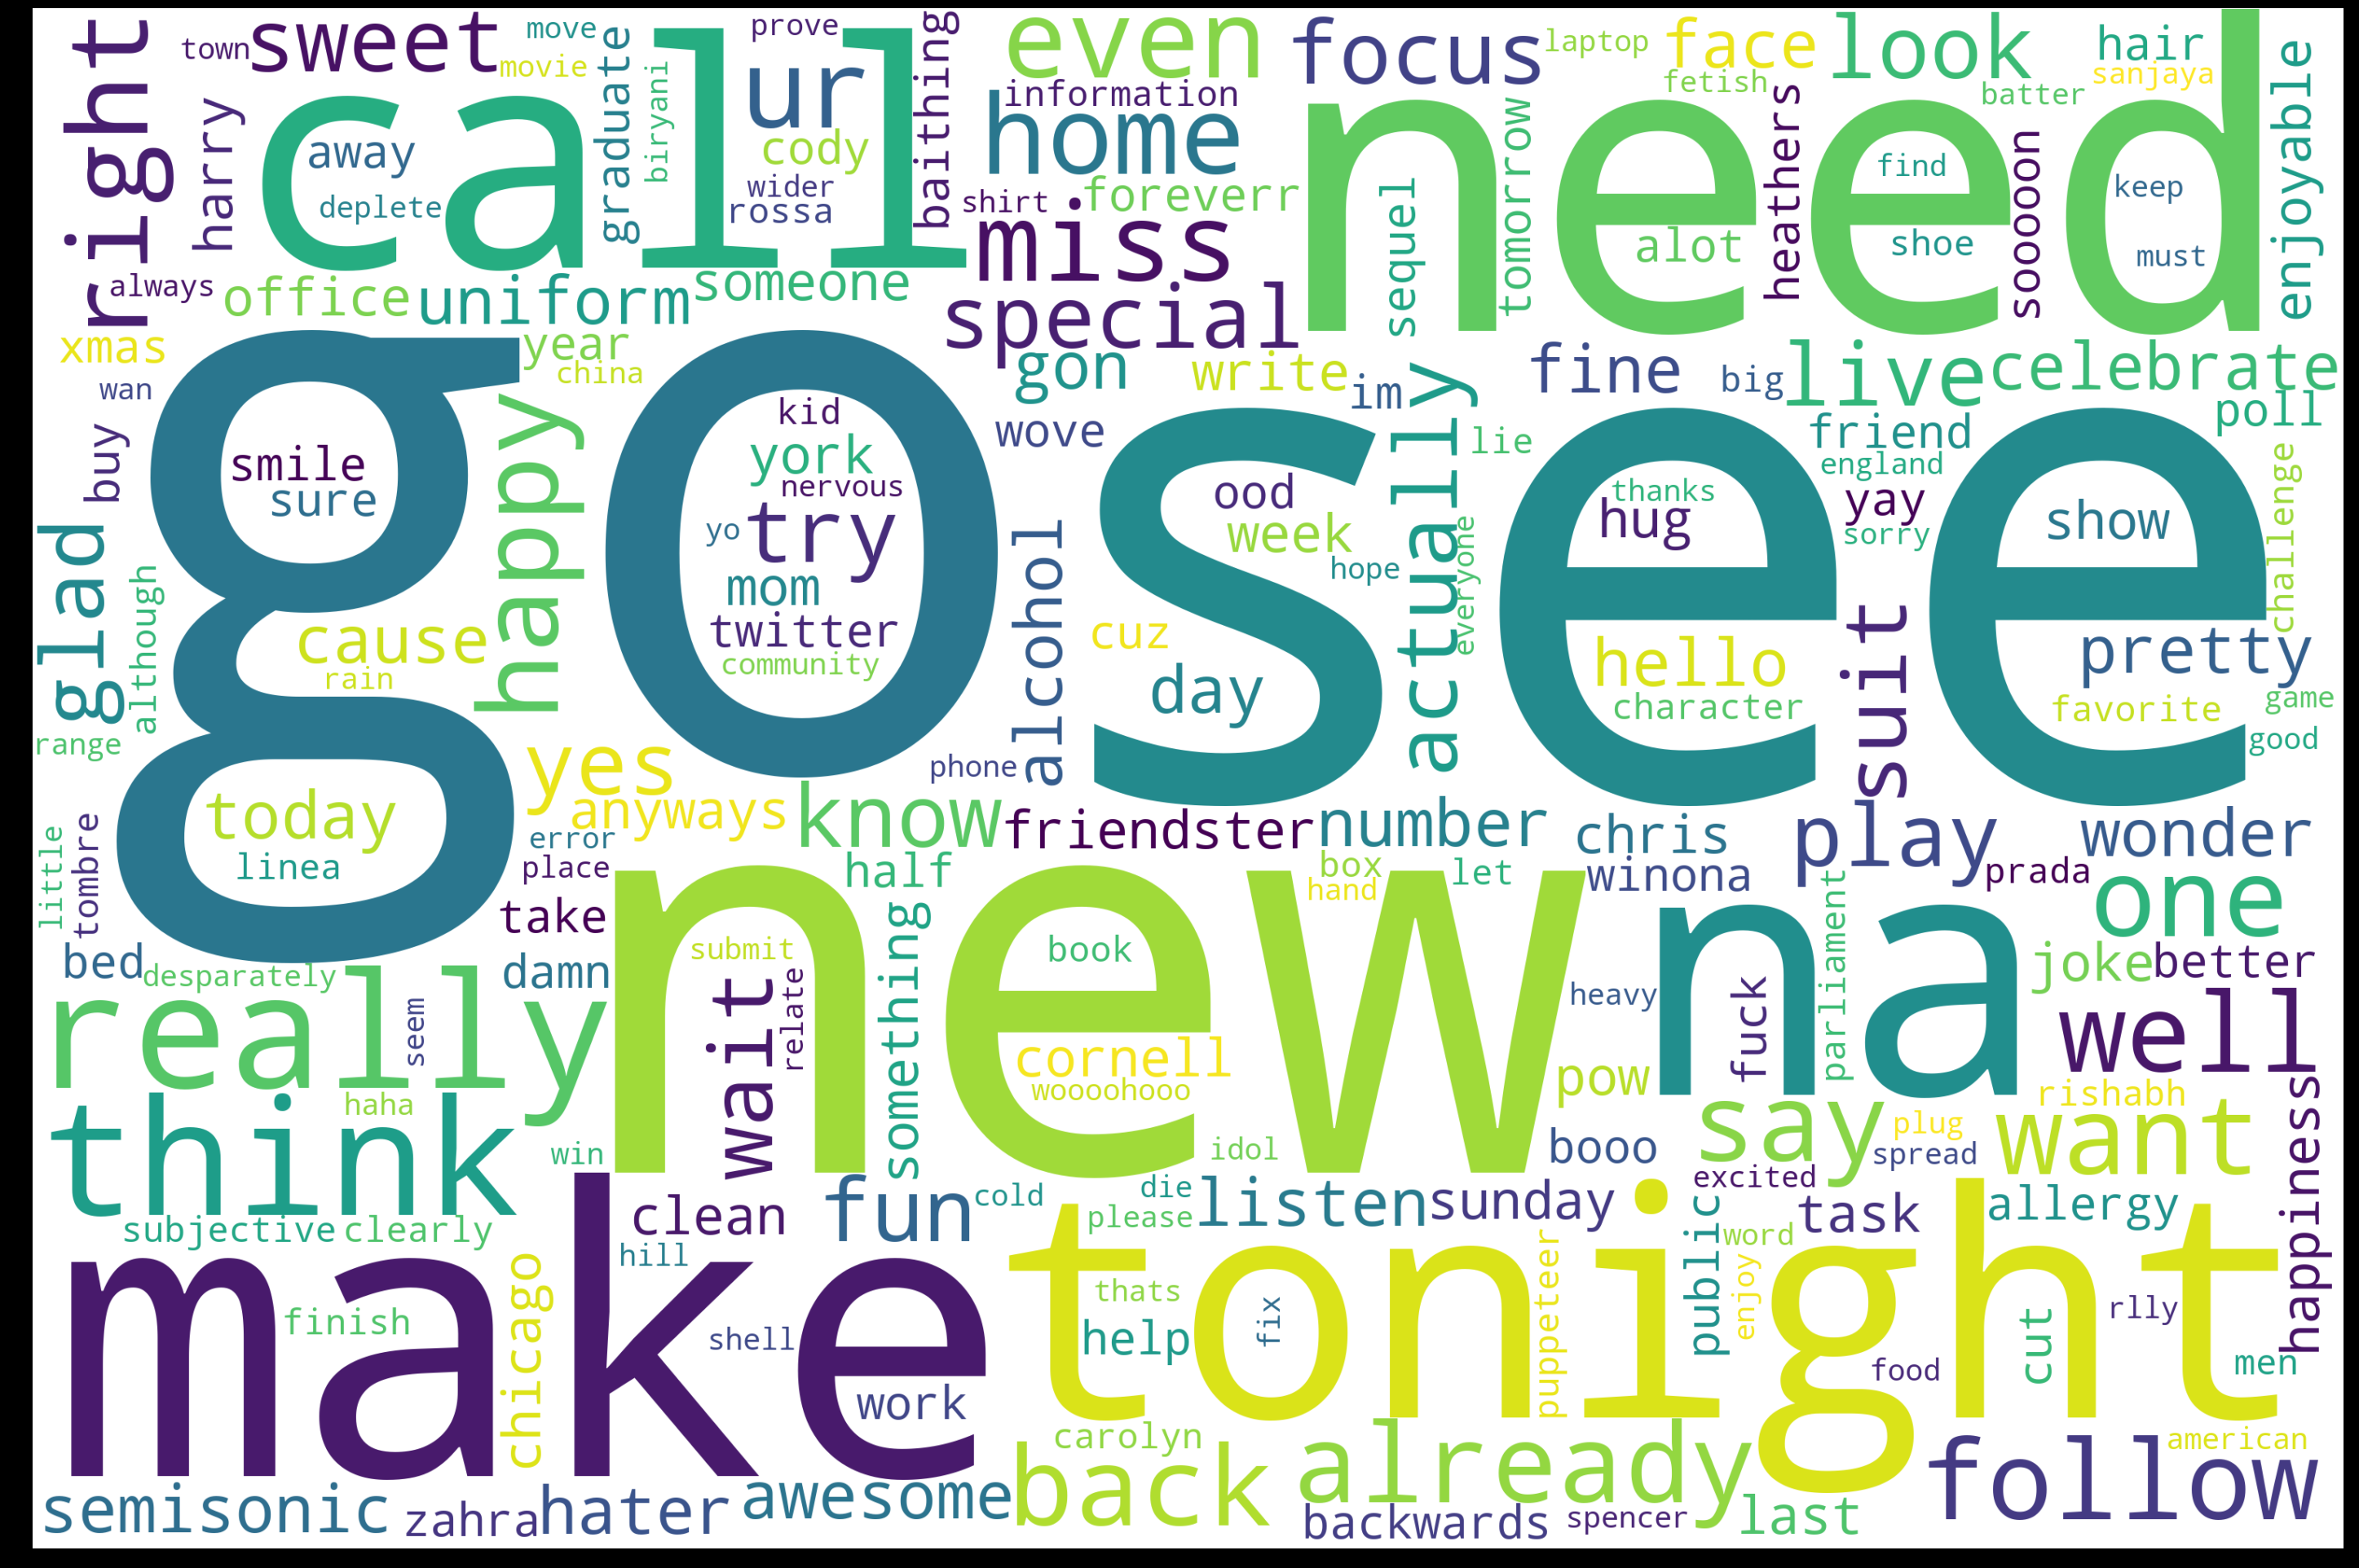

In [124]:
#build positive wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = ispositive.normal
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [127]:
vectorized_data

<93663x347405 sparse matrix of type '<class 'numpy.int64'>'
	with 992399 stored elements in Compressed Sparse Row format>

In [128]:
vectorized_data.shape

(93663, 347405)

In [ ]:
######################################################### BEFORE NEGATION

#best NB model according to grid:

[[5441 2928]
 [2546 7875]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67      8369
           1       0.73      0.76      0.74     10421

    accuracy                           0.71     18790
   macro avg       0.71      0.70      0.70     18790
weighted avg       0.71      0.71      0.71     18790

0.7086748270356573

#best svc model C=0.1


[[5005 3266]
 [2019 8509]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.65      8271
           1       0.72      0.81      0.76     10528

    accuracy                           0.72     18799
   macro avg       0.72      0.71      0.71     18799
weighted avg       0.72      0.72      0.72     18799

0.7188680248949412
